In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm
from scipy.optimize import curve_fit

SAVE_PLOTS = True

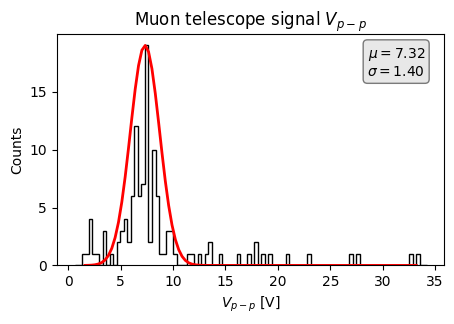

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5, 3))

file_path = r'data\muon_telescope\vp2ps_20250312-200311.csv'
df = pd.read_csv(file_path)

min = df['V'].min()
max = df['V'].max()


count, bins, _ = ax.hist(df['V'], bins=100, range=(min - 1, max + 1), histtype='step', color='black')
# force the y axis to be in whole numbers
ax.yaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel(r'$V_{p-p}$ [V]')
ax.set_ylabel('Counts')

data_for_fitting = df['V'].where(df['V'] < 12).dropna()
data_for_fitting = data_for_fitting.where(data_for_fitting > 4).dropna()
mu_fit, sigma_fit = norm.fit(data_for_fitting)  # Fit mean and standard deviation

x = np.linspace(df['V'].min(), df['V'].max(), 100)
pdf = norm.pdf(x, mu_fit, sigma_fit)  # Compute Gaussian function
pdf *= count.max() / pdf.max()  # Normalize to the histogram
plt.plot(x, pdf, 'r', linewidth=2, label=f'Fit: $\mu$={mu_fit:.2f}, $\sigma$={sigma_fit:.2f}')

# display the fit parameters at the top right corner of the plot
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_fit, ),
    r'$\sigma=%.2f$' % (sigma_fit, )))
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)




ax.set_title(r'Muon telescope signal $V_{p-p}$')
if SAVE_PLOTS:
    plt.savefig'plots/muon_telescope/gauss_fit.jpg', dpi=300)
plt.show()